<a href="https://colab.research.google.com/github/Twahaaa/Makemore/blob/main/makemore_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read all the words
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
chars=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size=3
X,Y=[],[]

for w in words:
  #print(w)
  context = [0] * block_size # context = [0,0,0]

  for ch in w + '.':
    ix=stoi[ch]
    X.append(context) # store current context as an input sample
    Y.append(ix) # Store the index of the next character as the target output
    context = context[1:] + [ix] # Shift the context window and add the new character index

X=torch.tensor(X)
Y=torch.tensor(Y)

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [ ]:
context

[26, 24, 0]

In [ ]:
C = torch.randn([27,2])

In [ ]:
C

tensor([[ 2.0443,  0.7277],
        [-1.0658,  0.8662],
        [ 1.3288, -0.4771],
        [-1.1050,  1.7457],
        [-1.0283, -0.1391],
        [-0.2770, -0.9657],
        [-0.9476, -1.2448],
        [ 1.5825, -0.1401],
        [-0.2871, -0.4373],
        [-0.2636,  0.1165],
        [ 1.4591,  0.2443],
        [ 0.6271, -0.4879],
        [ 0.0137,  0.8662],
        [ 0.9180,  0.2779],
        [-1.7112,  0.3300],
        [ 3.6360, -0.3944],
        [ 0.0306,  1.6947],
        [-0.2566,  0.8236],
        [ 1.1253, -0.0753],
        [-0.4724,  0.1528],
        [-0.2564, -1.4246],
        [-0.4654,  1.1321],
        [-0.6441,  0.2164],
        [-0.2653,  0.7366],
        [-1.8147, -0.8538],
        [-0.1908, -1.5093],
        [ 2.1885,  0.3960]])

In [ ]:
C[X].shape #embedding for each layer of X

torch.Size([228146, 3, 2])

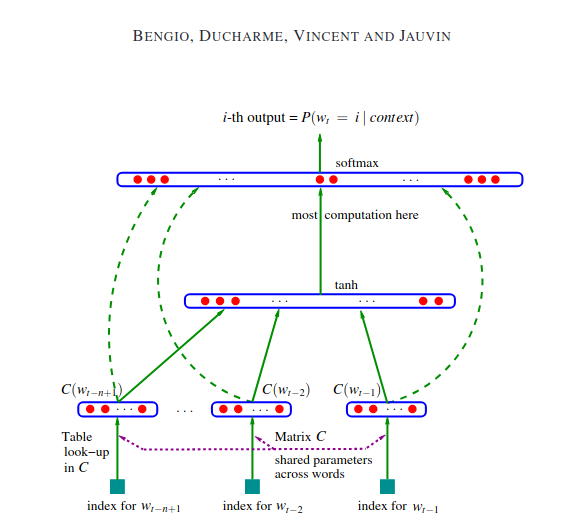

So the Emebedding is for 3 C's with 2 dimentional embeddings, Hence the shape (/32/,3,2)

In [ ]:
emb=C[X]

In [ ]:
emb

tensor([[[ 2.0443,  0.7277],
         [ 2.0443,  0.7277],
         [ 2.0443,  0.7277]],

        [[ 2.0443,  0.7277],
         [ 2.0443,  0.7277],
         [-0.2770, -0.9657]],

        [[ 2.0443,  0.7277],
         [-0.2770, -0.9657],
         [ 0.9180,  0.2779]],

        ...,

        [[ 2.1885,  0.3960],
         [ 2.1885,  0.3960],
         [-0.1908, -1.5093]],

        [[ 2.1885,  0.3960],
         [-0.1908, -1.5093],
         [ 2.1885,  0.3960]],

        [[-0.1908, -1.5093],
         [ 2.1885,  0.3960],
         [-1.8147, -0.8538]]])

In [ ]:
w1=torch.randn([6,100]) # 6->no of inputs and 100->no of nuerons(upto us)
b1=torch.randn(100)

In [ ]:
h=torch.tanh(emb.view(-1,6) @ w1 + b1) #the hidden activation layer (-1,6) -1->torch automatically infers the dimention and 6->2*3

In [ ]:
(emb.view(-1,6) @ w1).shape

torch.Size([228146, 100])

In [ ]:
b1.shape

torch.Size([100])

In [ ]:
#so the addition will be
#32,100
#1,100, the brodcasting is done to the right so a new '1' dimention is added to the left so that addition is possible
#so this does row wise elemental addition

In [ ]:
h

tensor([[ 0.9709,  0.9999, -0.9877,  ..., -1.0000, -0.1650, -0.9999],
        [-0.9451,  1.0000, -1.0000,  ..., -0.9998,  0.9673, -1.0000],
        [ 0.9998,  0.9073,  0.3758,  ..., -0.9926, -0.8990, -0.4831],
        ...,
        [-0.8897,  1.0000, -1.0000,  ..., -1.0000,  0.9115, -1.0000],
        [ 1.0000,  0.6704,  0.9021,  ..., -0.9996, -0.9981, -0.8675],
        [-0.9999,  0.9653, -1.0000,  ..., -0.9999,  1.0000, -0.9892]])

In [ ]:
 #numbers to pass to the ouput layer (aka logits)
 w2=torch.randn([100,27]) # 100-> input from the previous layer and 27 is to pass to the output layer in this case (27, no of alphabets)
 b2=torch.randn(27)

In [ ]:
logits = h @ w2 + b2

In [ ]:
logits.shape

torch.Size([228146, 27])

In [ ]:
 counts = logits.exp()


In [ ]:
probs = counts / counts.sum(1, keepdims=True)

In [ ]:
probs.shape

torch.Size([228146, 27])

In [ ]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [ ]:
loss = F.cross_entropy(logits, Y)

In [ ]:
loss

tensor(17.2028)

In [ ]:
parameters=[C,w1,b1,w2,b2]

In [ ]:
sum(p.nelement() for p in parameters) #total number of parameters

3481

In [ ]:
for p in parameters:
  p.requires_grad=True

In [ ]:
for _ in range(1000):
  #mini batch construct
  ix=torch.randint(0,X.shape[0],(32,))
  #forward pass
  emb=C[X[ix]]
  h=torch.tanh(emb.view(-1,6) @ w1 + b1)
  logits = h @ w2 + b2
  loss = F.cross_entropy(logits,Y[ix])
  #backward pass
  for p in parameters:
    p.grad=None
  loss.backward()
  for p in parameters:
    p.data += -0.1 * p.grad

print(loss.item())

2.465536117553711


In [ ]:
emb=C[X]
h=torch.tanh(emb.view(-1,6) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(2.6819, grad_fn=<NllLossBackward0>)

In [ ]:
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

dervane.
rma.
dirmyndal.
racina.
ruev.
jitae.
ja.
lakas.
mayno.
mala.
aooqun.
asinn.
saiin.
emonyamhann.
kulsanayenmenal.
dmmwione.
draen.
graa.
maidy.
ayn.
